In [57]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter("ignore", FutureWarning)

In [58]:
url = 'https://api.spacexdata.com/v5/launches/'
response = requests.get(url)
# Check if the response is successful
if response.status_code == 200:
    # Load the data into a pandas DataFrame
    data = response.json()
    df = pd.json_normalize(data)  # Flatten nested structures
    # Show the first few rows for reference
    df.head()
else:
    df = None
    response.status_code  # return the error code if failed

In [59]:
df.head(1)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN


In [60]:
# Normalizing failure and core columns
df['failures_normalized'] = df['failures'].apply(lambda x: x[0] if len(x) > 0 else {})
failures_df = pd.json_normalize(df['failures_normalized']).add_prefix('f_')
df = pd.concat([df.drop(columns=['failures_normalized','failures']), failures_df], axis=1)
df['cores_normalized'] = df['cores'].apply(lambda x: x[0] if len(x) > 0 else {})
cores_df = pd.json_normalize(df['cores_normalized']).add_prefix('c_')
df = pd.concat([df.drop(columns=['cores_normalized','cores']), cores_df], axis=1)

In [61]:
# Replace emty lists and None's with nan
df = df.applymap(lambda x: np.nan if (x is None or (isinstance(x, list) and len(x) == 0)) else x)

In [62]:
df.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings,f_time,f_altitude,f_reason,c_core,c_flight,c_gridfins,c_legs,c_reused,c_landing_attempt,c_landing_success,c_landing_type,c_landpad
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,NaN,NaN,NaN,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,True,False,NaN,5eb87cd9ffd86e000604b32a,False,False,False,NaN,https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN,33.0,NaN,merlin engine failure,5e9e289df35918033d3b2623,1.0,False,False,False,False,NaN,NaN,NaN
1,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",NaN,NaN,NaN,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,True,False,NaN,5eb87cdaffd86e000604b32b,False,False,False,NaN,https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN,301.0,289.0,harmonic oscillation leading to premature engine shutdown,5e9e289ef35918416a3b2624,1.0,False,False,False,False,NaN,NaN,NaN
2,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,NaN,NaN,NaN,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,True,False,NaN,5eb87cdbffd86e000604b32c,False,False,False,NaN,https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN,140.0,35.0,residual stage-1 thrust led to collision between stage 1 and stage 2,5e9e289ef3591814873b2625,1.0,False,False,False,False,NaN,NaN,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",NaN,NaN,NaN,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,True,False,NaN,5eb87cdbffd86e000604b32d,False,False,False,NaN,https://images2.imgbox.com/95/39/sRqN7rsv_o.png,https://images2.imgbox.com/a3/99/qswRYzE8_o.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN,NaN,NaN,NaN,5e9e289ef3591855dc3b2626,1.0,False,False,False,False,NaN,NaN,NaN
4,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,NaN,NaN,NaN,NaN,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de5

In [63]:
# Check dimensionality
df.shape

(205, 53)

In [64]:
# check column names
df.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'details', 'crew', 'ships', 'capsules', 'payloads',
       'launchpad', 'flight_number', 'name', 'date_utc', 'date_unix',
       'date_local', 'date_precision', 'upcoming', 'auto_update', 'tbd',
       'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings', 'f_time', 'f_altitude', 'f_reason', 'c_core', 'c_flight',
       'c_gridfins', 'c_legs', 'c_reused', 'c_landing_attempt',
       'c_landing_success', 'c_landing_type', 'c_landpad'],
      dtype='object')

In [65]:
# Check column types
df.dtypes.reset_index()

,index,0
0,static_fire_date_utc,object
1,static_fire_date_unix,float64
2,net,bool
3,window,float64
4,rocket,object
5,success,object
6,details,object
7,crew,object
8,ships,object
9,capsules,object


In [66]:
# Convert specified columns to datetime
df['date_utc'] = pd.to_datetime(df['date_utc'])
df['launch_year'] = df['date_utc'].dt.year
df['launch_month'] = df['date_utc'].dt.month

In [67]:
# Reduce dimensionality for easier analysis
cols_to_keep = ['id','name','success','flight_number','launchpad','c_core','c_flight','c_reused','c_landing_success','launch_year','launch_month','date_utc']
df = df.loc[:,cols_to_keep]

In [68]:
# Check missing information
df.isna().mean().reset_index().sort_values(by=0, ascending = False)

,index,0
8,c_landing_success,0.239024
2,success,0.092683
5,c_core,0.082927
6,c_flight,0.082927
7,c_reused,0.029268
0,id,0.000000
1,name,0.000000
3,flight_number,0.000000
4,launchpad,0.000000
9,launch_year,0.000000


In [69]:
# Check descriptive stats for all columns
df.describe(include='all')

,id,name,success,flight_number,launchpad,c_core,c_flight,c_reused,c_landing_success,launch_year,launch_month,date_utc
count,205,205,186,205.000000,205,188,188.000000,199,156,205.000000,205.000000,205
unique,205,205,2,NaN,4,75,NaN,2,2,NaN,NaN,199
top,5eb87cd9ffd86e000604b32a,FalconSat,True,NaN,5e9e4501f509094ba4566f84,5e9e28a7f3591817f23b2663,NaN,True,True,NaN,NaN,2022-12-01 00:00:00+00:00
freq,1,1,181,NaN,112,14,NaN,115,143,NaN,NaN,5
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-24 22:30:00+00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 00:00:00+00:00
mean,NaN,NaN,NaN,102.814634,NaN,NaN,3.622340,NaN,NaN,2019.121951,6.629268,NaN
std,NaN,NaN,NaN,59.029112,NaN,NaN,3.263955,NaN,NaN,3.256932,3.506174,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,2006.000000,1.000000,NaN
25%,NaN,NaN,NaN,52.000000,NaN,NaN,1.000000,NaN,NaN,2017.000000,4.000000,NaN


In [70]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

In [71]:
cat_cols

Index(['id', 'name', 'success', 'launchpad', 'c_core', 'c_reused',
       'c_landing_success'],
      dtype='object')

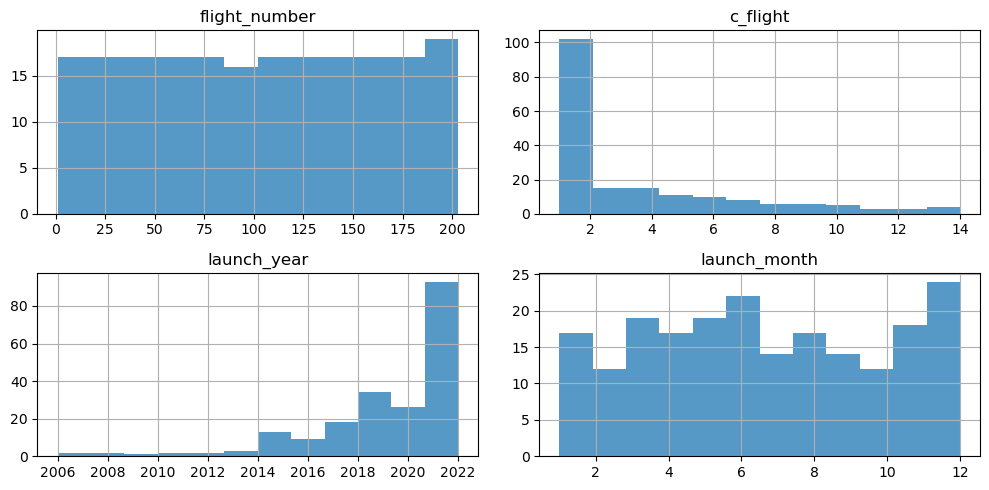

In [72]:
# Numerical column distributions
num_cols = df.select_dtypes(include=['number']).columns
df.loc[:, num_cols].hist(bins=12, figsize=(10, 5), alpha=0.75)
plt.tight_layout()
plt.show()

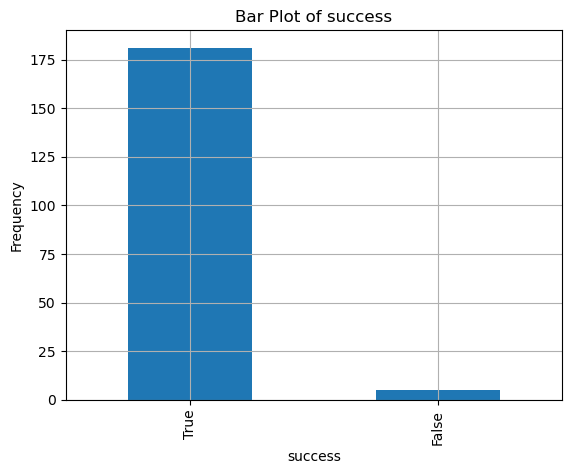

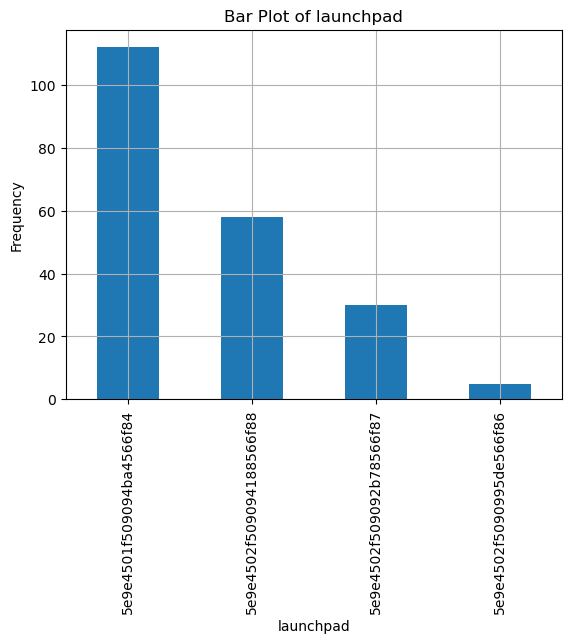

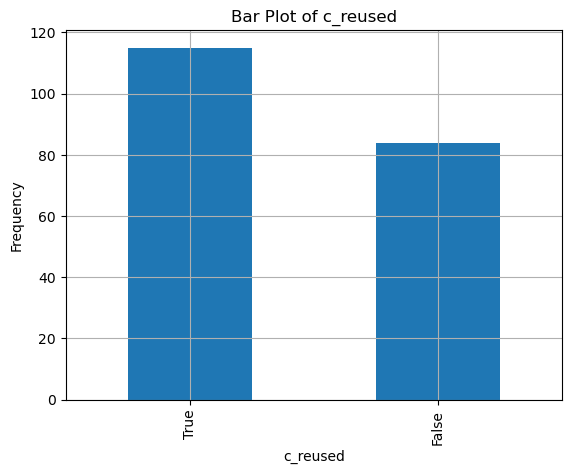

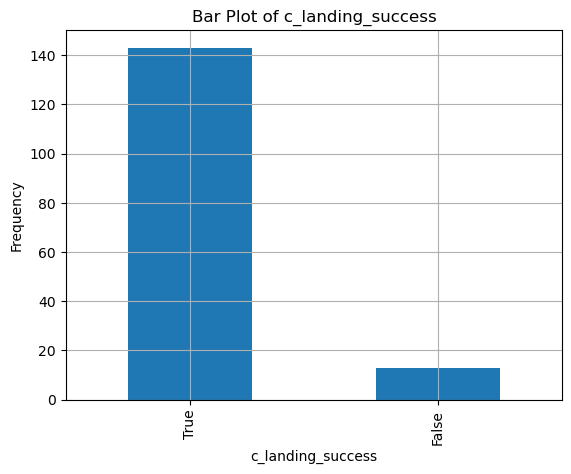

In [73]:
# Check barplots for categorical vars
cat_cols = ['success','launchpad','c_reused','c_landing_success']
for column in cat_cols:
    plt.figure()
    df[column].value_counts().plot(kind='bar', title=f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

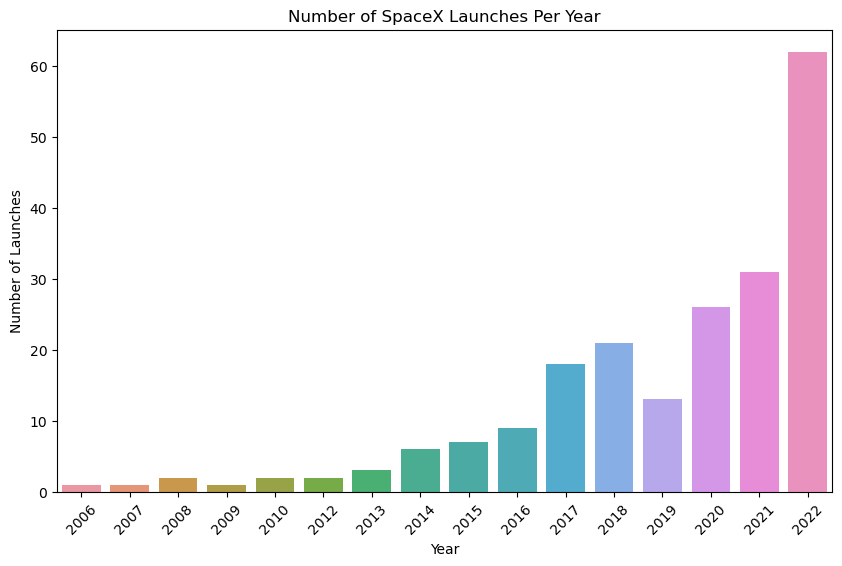

In [74]:
# Plot the number of launches per year
launches_per_year = df['launch_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=launches_per_year.index, y=launches_per_year.values)
plt.title('Number of SpaceX Launches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

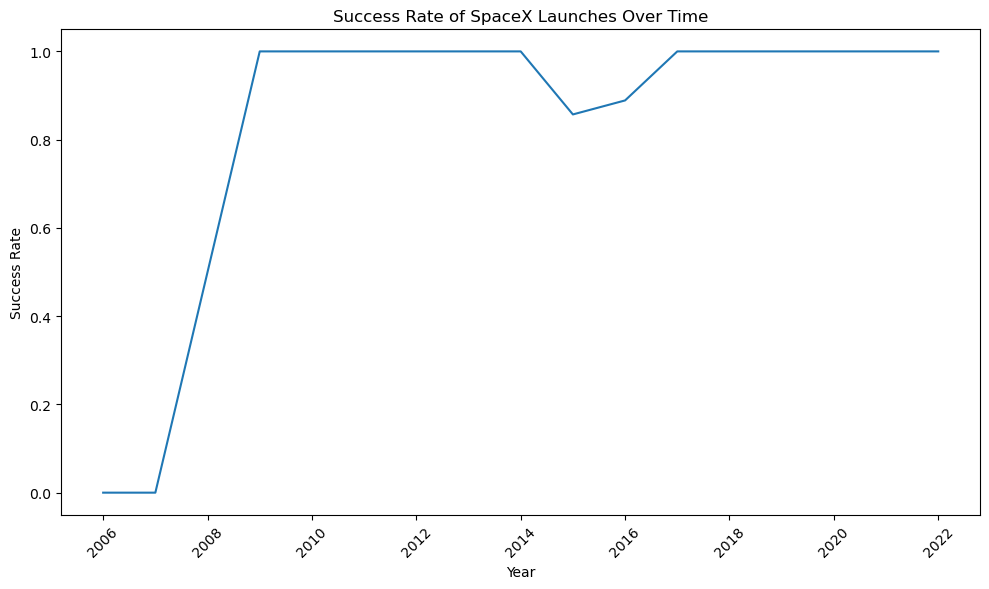

In [75]:
# Calculate success rate by year
success_rate_per_year = df.groupby('launch_year')['success'].mean()

# Line chart of success rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=success_rate_per_year.index, y=success_rate_per_year.values)
plt.title('Success Rate of SpaceX Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

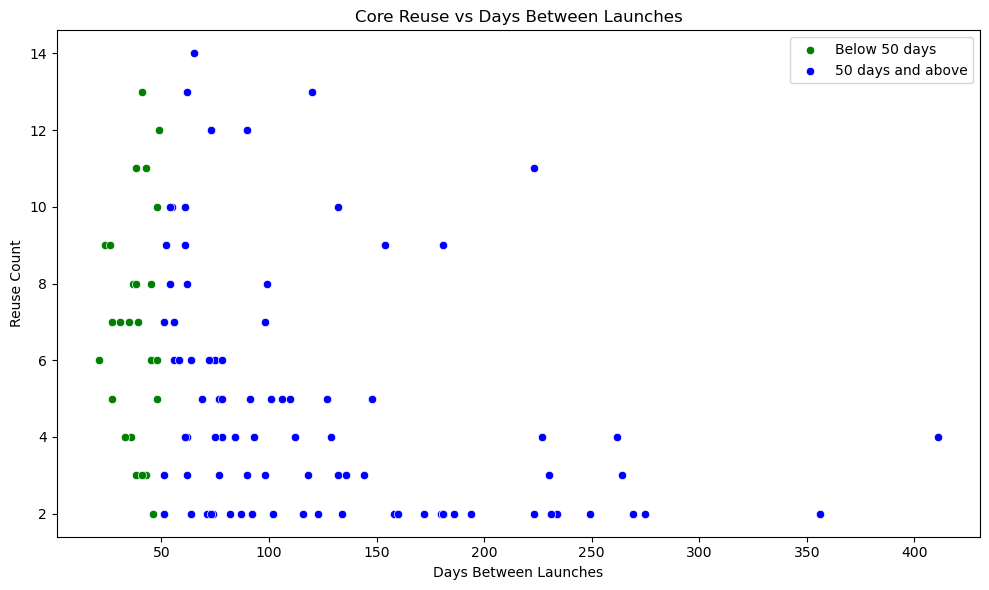

In [78]:
# Calculate days between launches for reused cores
df['previous_launch_date'] = df.groupby('c_core')['date_utc'].shift(1)
df['days_between_launches'] = (df['date_utc'] - df['previous_launch_date']).dt.days

# Filter the data for cores that have been reused
reused_cores = df[df['c_flight'] > 1]

# Separate the data based on days_between_launches
reused_cores_below_50 = reused_cores[reused_cores['days_between_launches'] < 50]
reused_cores_above_50 = reused_cores[reused_cores['days_between_launches'] >= 50]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot cores reused within 50 days (green)
sns.scatterplot(x='days_between_launches', y='c_flight', data=reused_cores_below_50, color='green', label='Below 50 days')

# Plot cores reused after 50 days (blue)
sns.scatterplot(x='days_between_launches', y='c_flight', data=reused_cores_above_50, color='blue', label='50 days and above')

# Add plot details
plt.title('Core Reuse vs Days Between Launches')
plt.xlabel('Days Between Launches')
plt.ylabel('Reuse Count')
plt.legend()
plt.tight_layout()

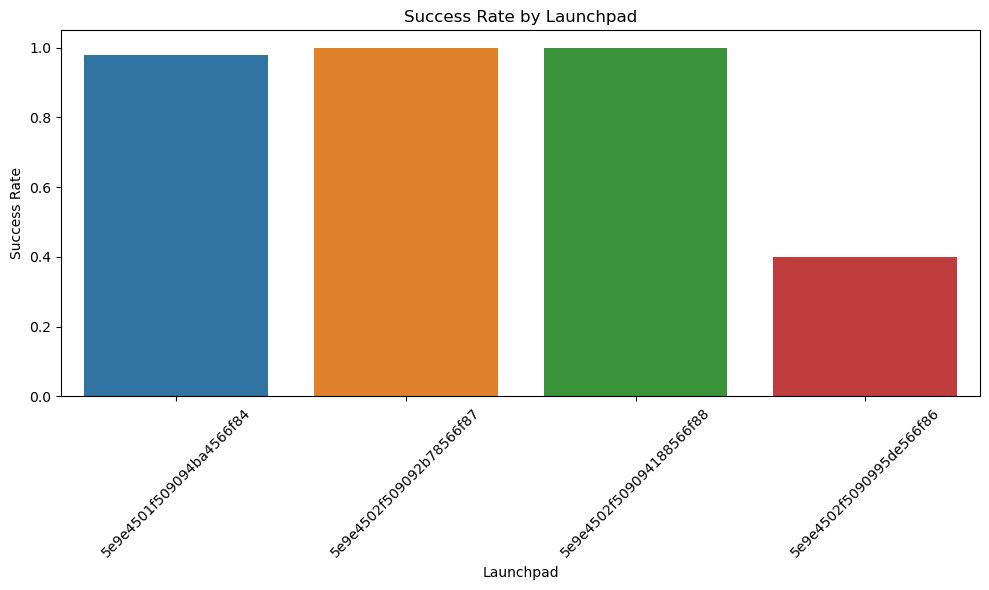

In [80]:
# Calculate success rate per launchpad
success_rate_per_launchpad = df.groupby('launchpad')['success'].mean()

# Bar chart of success rate by launchpad
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate_per_launchpad.index, y=success_rate_per_launchpad.values)
plt.title('Success Rate by Launchpad')
plt.xlabel('Launchpad')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

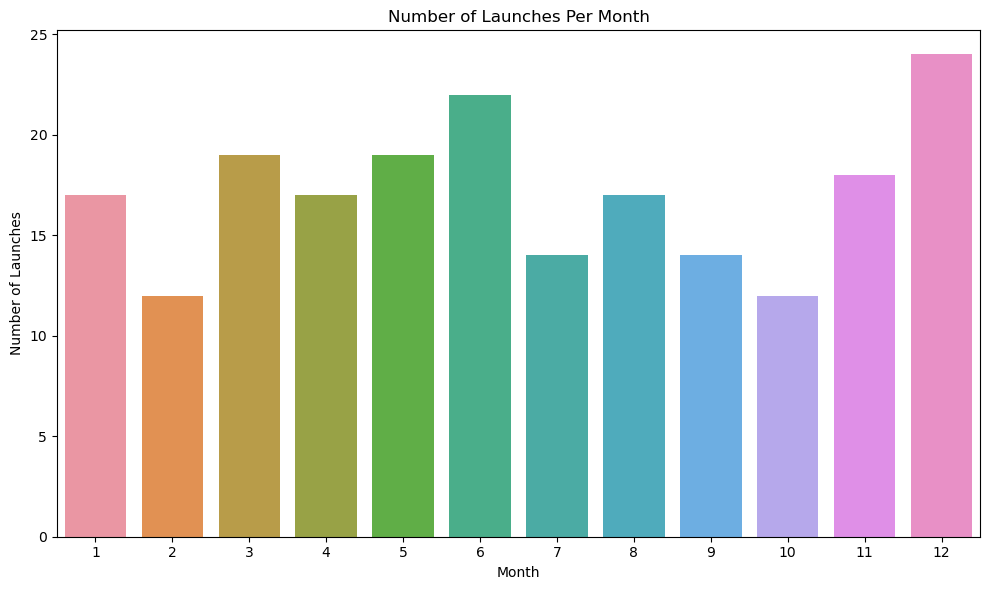

In [81]:
# Determine the busiest launch months
launches_per_month = df['launch_month'].value_counts().sort_index()

# Bar chart for launches per month
plt.figure(figsize=(10, 6))
sns.barplot(x=launches_per_month.index, y=launches_per_month.values)
plt.title('Number of Launches Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.tight_layout()
plt.show()

In [82]:
# Calculate the average days between launches for all launches
average_days_between_launches = df['days_between_launches'].mean()
print(f"Average days between launches: {average_days_between_launches:.2f} days")

Average days between launches: 103.82 days


In [84]:
# Analyze the success rate per year to assess improvement over time
success_rate_per_year = df.groupby('launch_year')['success'].mean()
print(success_rate_per_year)

launch_year
2006    0.000000
2007    0.000000
2008    0.500000
2009    1.000000
2010    1.000000
2012    1.000000
2013    1.000000
2014    1.000000
2015    0.857143
2016    0.888889
2017    1.000000
2018    1.000000
2019    1.000000
2020    1.000000
2021    1.000000
2022    1.000000
Name: success, dtype: float64
